In [1]:
# sampling frequency, time interval and sample frequency 
Fs = 500
tstep = 1/Fs 
f0 = 100

# number of samples
N = int(10 * Fs / f0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# time steps 
t = np.linspace(0, (N-1)*tstep, N)

# frequency steps 
fstep = Fs/N
f = np.linspace(0, (N-1)*fstep, N)

y = np.sin(2 * np.pi * f0 * t) + 4 * np.sin(2 * np.pi * 3 * f0 * t) 

X = np.fft.fft(y)
X_mag = np.abs(X)/ N

f_plot = f[0:int(N/2 + 1)]
X_mag_plot = 2 * X_mag[0:int(N/2 + 1)]
X_mag_plot[0] = X_mag_plot[0] / 2 

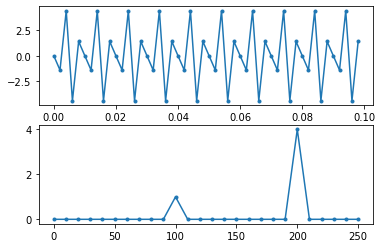

In [4]:
fix, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)

ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
plt.show()

In [21]:
import pandas as pd 
# how to find the index of the 
int(np.where(X_mag_plot == max(X_mag_plot))[0])

f_plot[20]

200.0

In [6]:
# data with 0.05mm increments mirrored at the central maxima 

SLD_df = pd.read_excel('SLD_contrast.xlsx', usecols='D:E', index_col=0)

SLD_df = SLD_df.sort_index()

SLD_df

,Contrast/V.1
Airgap/mm.1,
9.30,0.08
9.31,0.04
9.32,0.04
9.33,0.08
9.34,0.04
...,...
11.66,0.24
11.67,0.20
11.68,0.12


<AxesSubplot:title={'center':'SLD Fringes'}, xlabel='Airgap/mm.1', ylabel='Contrast /V'>

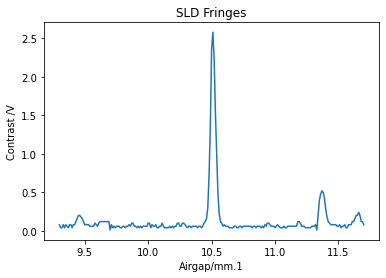

In [7]:
SLD_df.plot(title='SLD Fringes', legend=False, ylabel='Contrast /V')

In [8]:
# first we must find out some stuff about our data 

N = len(SLD_df)

SAMPLE_RATE = 0.05 # mm

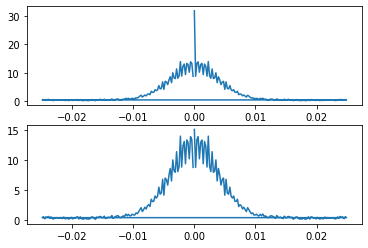

In [9]:
# now import fft tools from scipy 

from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft

yf = fft(list(SLD_df['Contrast/V.1']))
xf = fftfreq(N, 1/SAMPLE_RATE)

yf2 = fft(list(SLD_df['Contrast/V.1']-.07)) # think about rms here

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(xf, np.abs(yf))
ax2.plot(xf, np.abs(yf2))

In [10]:
list(SLD_df['Contrast/V.1'])

[0.08,
 0.04,
 0.04,
 0.08,
 0.04,
 0.08,
 0.06,
 0.04,
 0.08,
 0.08,
 0.04,
 0.08,
 0.08,
 0.12,
 0.16,
 0.2,
 0.2,
 0.18,
 0.16,
 0.12,
 0.08,
 0.08,
 0.08,
 0.08,
 0.06,
 0.06,
 0.06,
 0.06,
 0.1,
 0.08,
 0.06,
 0.1,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.012,
 0.08,
 0.04,
 0.06,
 0.04,
 0.06,
 0.06,
 0.06,
 0.04,
 0.04,
 0.06,
 0.06,
 0.04,
 0.06,
 0.06,
 0.08,
 0.06,
 0.1,
 0.1,
 0.06,
 0.06,
 0.04,
 0.06,
 0.04,
 0.06,
 0.04,
 0.06,
 0.06,
 0.06,
 0.06,
 0.1,
 0.1,
 0.04,
 0.08,
 0.06,
 0.06,
 0.08,
 0.04,
 0.04,
 0.06,
 0.06,
 0.1,
 0.06,
 0.04,
 0.04,
 0.04,
 0.04,
 0.06,
 0.04,
 0.06,
 0.04,
 0.06,
 0.06,
 0.1,
 0.1,
 0.06,
 0.06,
 0.1,
 0.1,
 0.08,
 0.06,
 0.04,
 0.06,
 0.06,
 0.04,
 0.06,
 0.06,
 0.06,
 0.06,
 0.04,
 0.06,
 0.06,
 0.04,
 0.06,
 0.1,
 0.12,
 0.16,
 0.3,
 0.72,
 1.36,
 2.36,
 2.58,
 2.24,
 1.54,
 1.0,
 0.48,
 0.22,
 0.12,
 0.1,
 0.06,
 0.08,
 0.06,
 0.06,
 0.06,
 0.04,
 0.04,
 0.04,
 0.04,
 0.06,
 0.06,
 0.04,
 0.04,
 0.06,
 0.06,
 0.04,
 